# Planning a telescope observation

In [1]:
import numpy as np
import scipy.stats
import pylab as plt
import astroML.stats

from astropy.visualization.hist import hist

plt.style.use('seaborn-v0_8-deep')
plt.rc('text', usetex=True)  
%matplotlib inline
%config InlineBackend.figure_format='retina'

In [2]:
random_state = np.random.RandomState(seed=10)

In [3]:
sunny = 1
cloudy = 0

N = 10000

current = cloudy

In [4]:
def sample(current, N):
    weather = [current]
    
    for i in range(1, N):
        p_acc = random_state.uniform(0, 1)

        if current == sunny:
            if p_acc < 0.9: 
                current = sunny
            else:
                current = cloudy
        elif current == cloudy:
            if p_acc < 0.5: 
                current = sunny
            else:
                current = cloudy

        weather.append(current)

    return np.array(weather)

In [5]:
weather = sample(current,N)
probability = np.mean(weather)
print(probability)

0.839


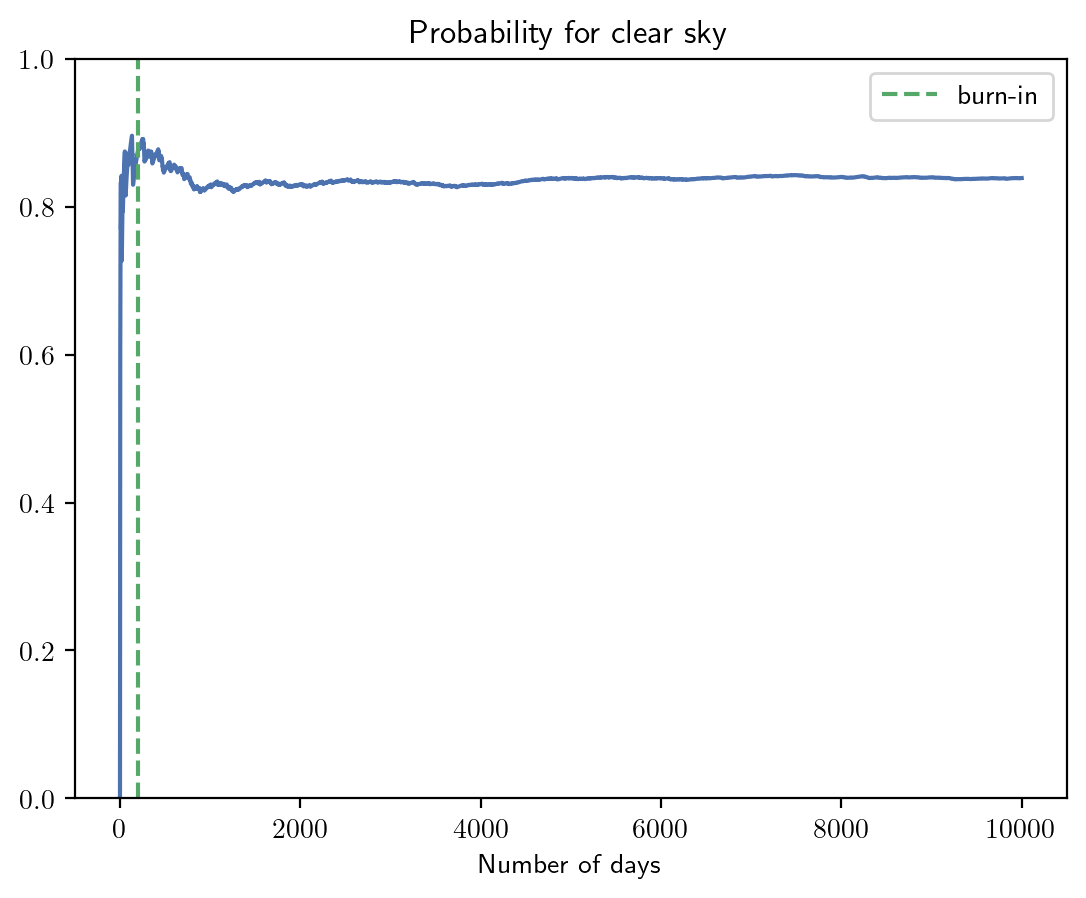

In [6]:
prob_during = np.cumsum(weather)/(np.arange(weather.size)+1)
plt.plot(prob_during)

burnin_index=2000
plt.axvline(200, ls='--', color='C1', label='burn-in')

plt.ylim(0,1)
plt.xlabel('Number of days')
plt.title('Probability for clear sky')
plt.legend()
plt.show()

Summary statistics

In [7]:
median = np.median(prob_during)
sigmaG = astroML.stats.sigmaG(prob_during)

print('Median:', median)
print('SigmaG:', sigmaG)

Median: 0.8382579279942055
SigmaG: 0.005398264916012217


Histogram of the plot

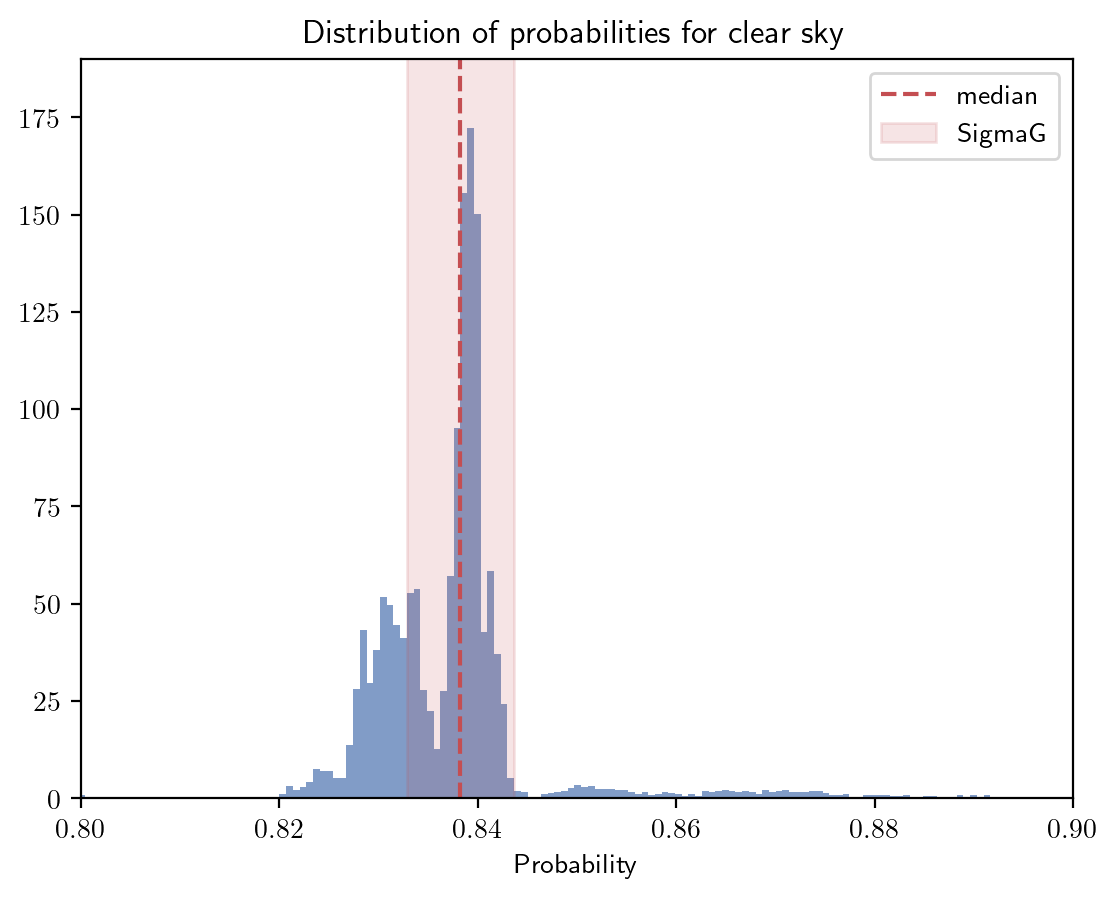

In [8]:
_ = hist(prob_during, bins="freedman",density=True,alpha=0.7)

plt.axvline(median, color='C2', ls='--', label='median')
y_grid = np.linspace(0,200,100)
plt.fill_betweenx(y_grid, median-sigmaG, median+sigmaG, color="C2", alpha=0.15, label="SigmaG")

plt.xlim(0.8,0.9)
plt.ylim(0,190)
plt.xlabel('Probability')
plt.title('Distribution of probabilities for clear sky')
plt.legend()
plt.show()

#### Burn-in

In [9]:
burnin_index=2000
prob_burn = prob_during[burnin_index:]

In [10]:
b_median = np.median(prob_burn)
b_sigmaG = astroML.stats.sigmaG(prob_burn)

print('Median:', b_median)
print('SigmaG:', b_sigmaG)

Median: 0.8384952068580387
SigmaG: 0.004282875449721581


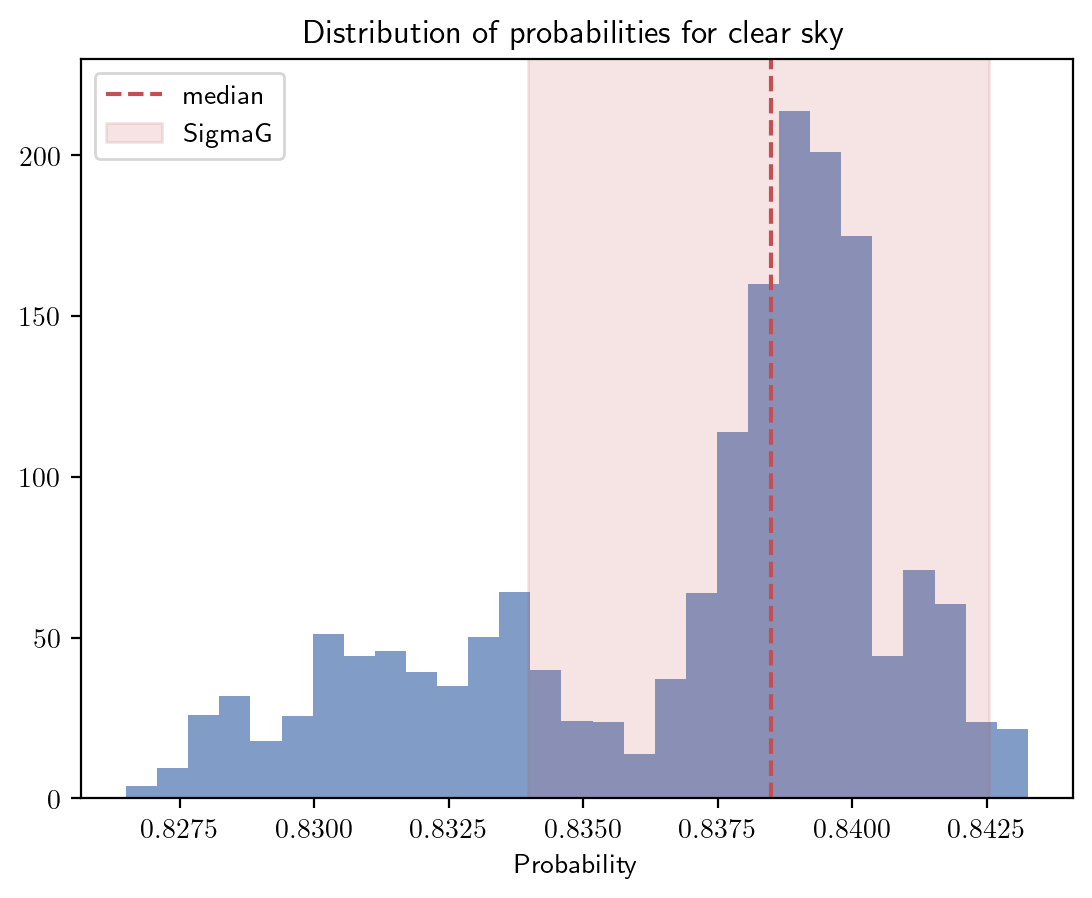

In [11]:
from astropy.visualization.hist import hist

_ = hist(prob_burn, bins="freedman",density=True,alpha=0.7)

plt.axvline(b_median, color='C2', ls='--', label='median')
y_grid = np.linspace(0,250,100)
plt.fill_betweenx(y_grid, median-b_sigmaG, median+b_sigmaG, color="C2", alpha=0.15, label="SigmaG")

#plt.xlim(0.8,0.9)
plt.ylim(0,230)
plt.xlabel('Probability')
plt.title('Distribution of probabilities for clear sky')
plt.legend()
plt.show()

### I cut off different numbers of initial points as burn-in. How does the mean/median change?

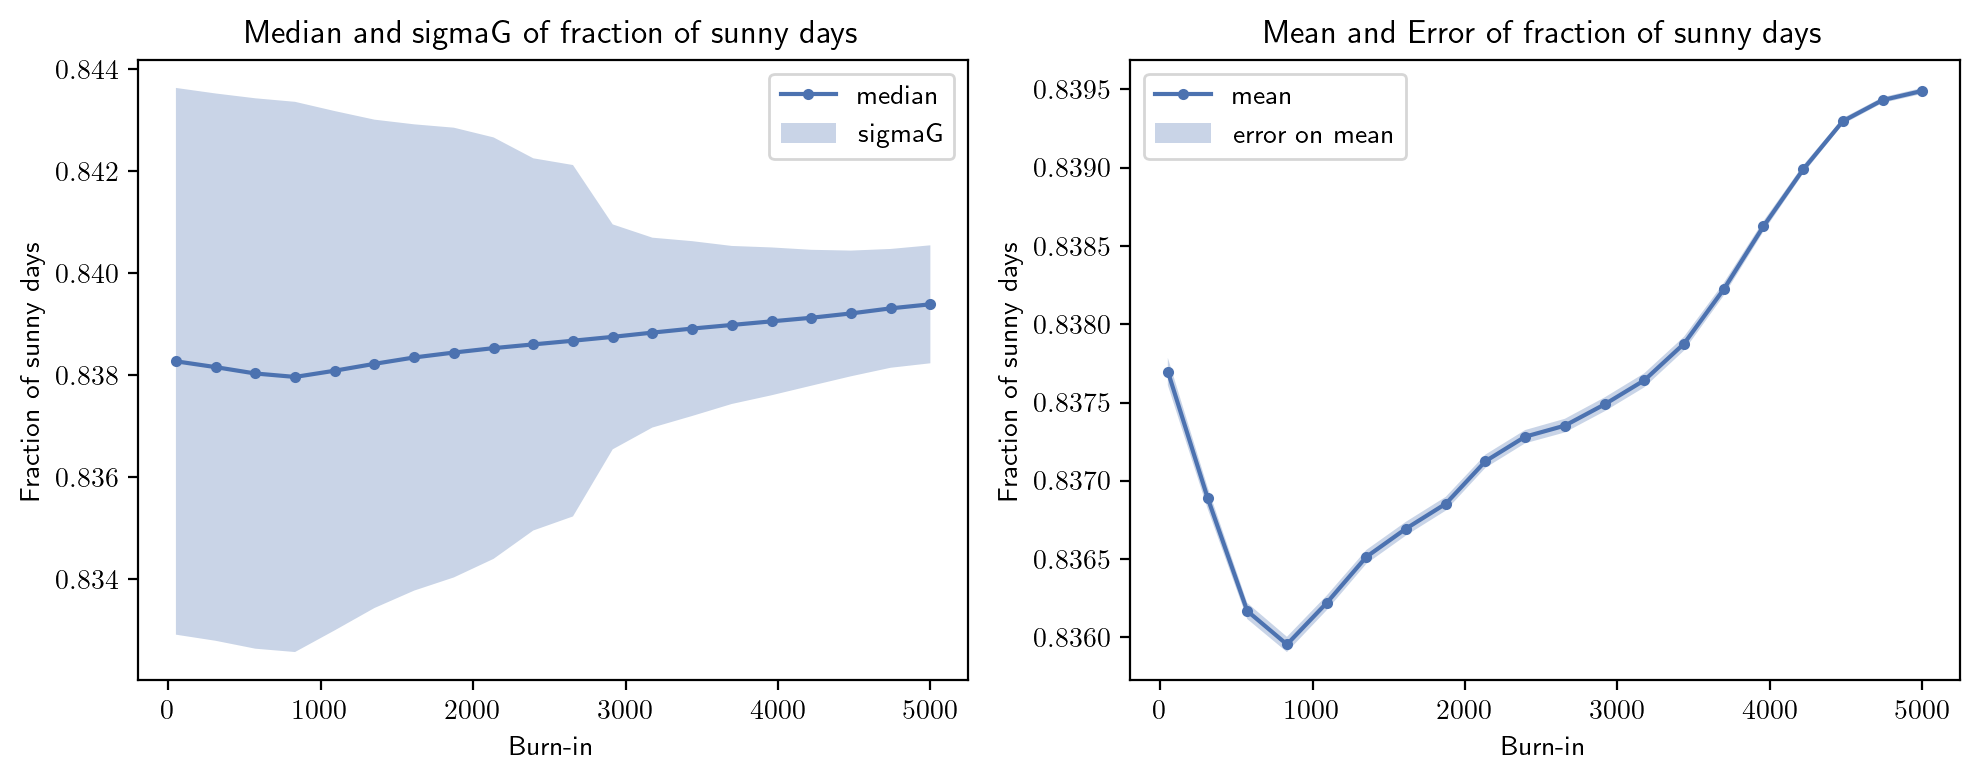

In [12]:
burn = np.linspace(50, 5000, 20)
median = []
mean = []
sigmaG = []
s_mean = []

for b in burn:
    prob_b = prob_during[int(b):]
    median.append(np.median(prob_b))
    mean.append(np.mean(prob_b))
    sigmaG.append(astroML.stats.sigmaG(prob_b))
    s_mean.append(np.std(prob_b)/np.sqrt(len(prob_b)))

g_down = np.array(median)-np.array(sigmaG)
g_up = np.array(median)+np.array(sigmaG)

s_down = np.array(mean)-np.array(s_mean)
s_up = np.array(mean)+np.array(s_mean)

fig, axs = plt.subplots(1, 2, figsize=(10, 4))

axs[0].plot(burn, median, marker='.', label='median')
axs[0].fill_between(burn, g_down, g_up, label='sigmaG', alpha=0.3)
#axs[0].set_ylim(0.8, 0.835) 
axs[0].set_title('Median and sigmaG of fraction of sunny days')
axs[0].set_xlabel('Burn-in')
axs[0].set_ylabel('Fraction of sunny days')
axs[0].legend()

axs[1].plot(burn, mean, marker='.', label='mean')
axs[1].fill_between(burn, s_down, s_up, label='error on mean', alpha=0.3)
#axs[1].set_ylim(0.8, 0.835) 
axs[1].set_title('Mean and Error of fraction of sunny days')
axs[1].set_xlabel('Burn-in')
axs[1].set_ylabel('Fraction of sunny days')
axs[1].legend()

plt.tight_layout()
plt.show()

# 

# Stock market

![](https://upload.wikimedia.org/wikipedia/commons/thumb/9/95/Finance_Markov_chain_example_state_space.svg/400px-Finance_Markov_chain_example_state_space.svg.png)

In [13]:
stagn = 0
bear = 1
bull = 2

def stock_market (current):
    if current == stagn: 
        return np.random.choice([stagn,bear,bull], p=[0.5,0.25,0.25])
    elif current == bear: 
        return np.random.choice([stagn,bear,bull], p=[0.05,0.8,0.15])
    elif current == bull: 
        return np.random.choice([stagn,bear,bull], p=[0.025,0.075,0.9])
    else:
        return NameError

In [14]:
def compute_freq (market, type_for_freq):
    freq_type = np.array([])
    mask = (market == type_for_freq)
    return np.append(freq_type, np.size(market[mask])/np.size(market))

In [15]:
def sample_market(current, N_iterations):
    market = np.array([current])
    freq_stagn = np.array([])
    freq_bull = np.array([])
    freq_bear = np.array([])

    for i in range(N_iterations):
        current = stock_market(current)
        market = np.append(market, current)
        
        freq_stagn = np.append(freq_stagn, compute_freq(market, stagn))
        freq_bear = np.append(freq_bear, compute_freq(market, bear))
        freq_bull = np.append(freq_bull, compute_freq(market, bull))
    
    return market, freq_stagn, freq_bear, freq_bull

In [16]:
np.random.seed(13)

In [17]:
N=10000
current = np.random.choice([stagn,bear,bull])

market, freq_stagn, freq_bear, freq_bull = sample_market(current, N)

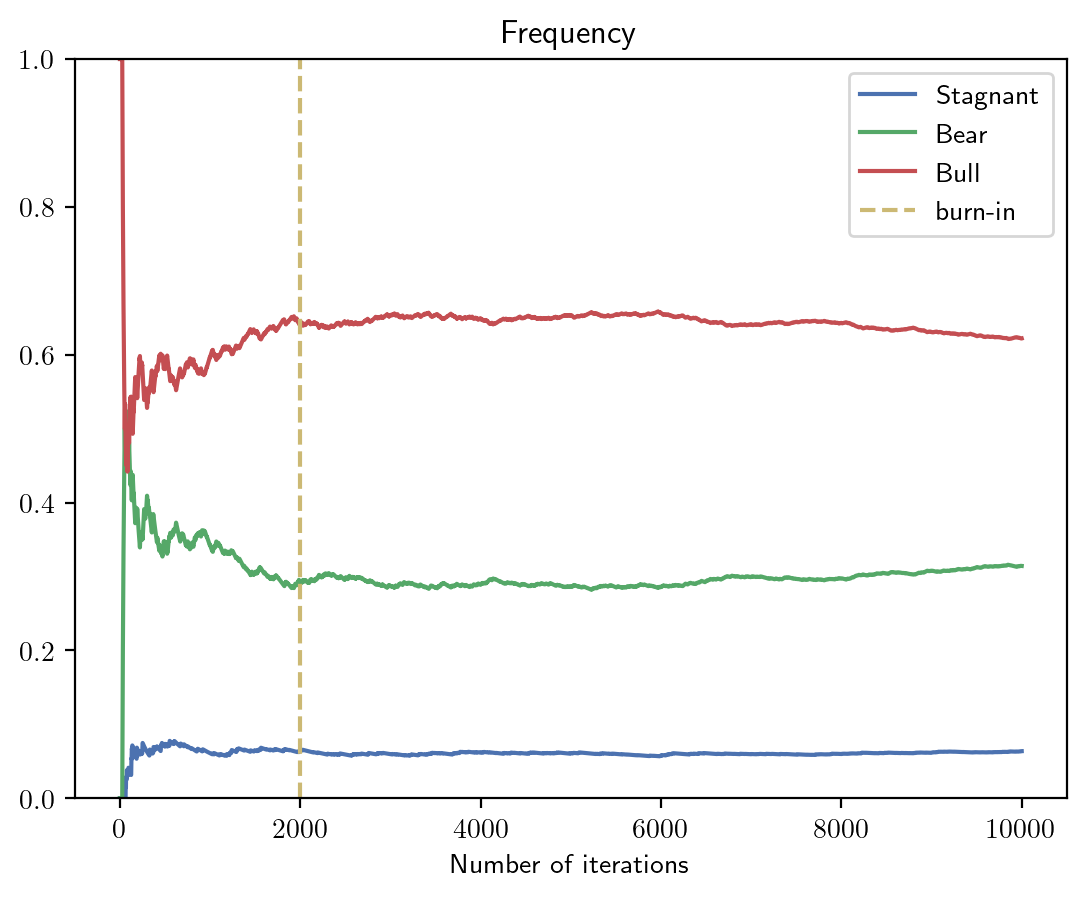

In [18]:
plt.plot(freq_stagn, label='Stagnant')
plt.plot(freq_bear, label='Bear')
plt.plot(freq_bull, label='Bull')

burnin_index=2000
plt.axvline(burnin_index, ls='--', color='C4', label='burn-in')

plt.ylim(0,1)
plt.xlabel('Number of iterations')
plt.title('Frequency')
plt.legend()
plt.show()

In [19]:
burnin_index=2000

freq_stagn_b = freq_stagn[burnin_index:]
freq_bear_b = freq_bear[burnin_index:]
freq_bull_b = freq_bull[burnin_index:]

In [20]:
median_stagn = np.median(freq_stagn_b)
sigmaG_stagn = astroML.stats.sigmaG(freq_stagn_b)

median_bear = np.median(freq_bear_b)
sigmaG_bear = astroML.stats.sigmaG(freq_bear_b)

median_bull = np.median(freq_bull_b)
sigmaG_bull = astroML.stats.sigmaG(freq_bull_b)

print('Median:', median_stagn)
print('SigmaG:', sigmaG_stagn)
print()

print('Median:', median_bear)
print('SigmaG:', sigmaG_bear)
print()

print('Median:', median_bull)
print('SigmaG:', sigmaG_bull)

Median: 0.06054200122437146
SigmaG: 0.0013539911294958387

Median: 0.29554735949384753
SigmaG: 0.009490430226355822

Median: 0.644580196210571
SigmaG: 0.009123481138277463


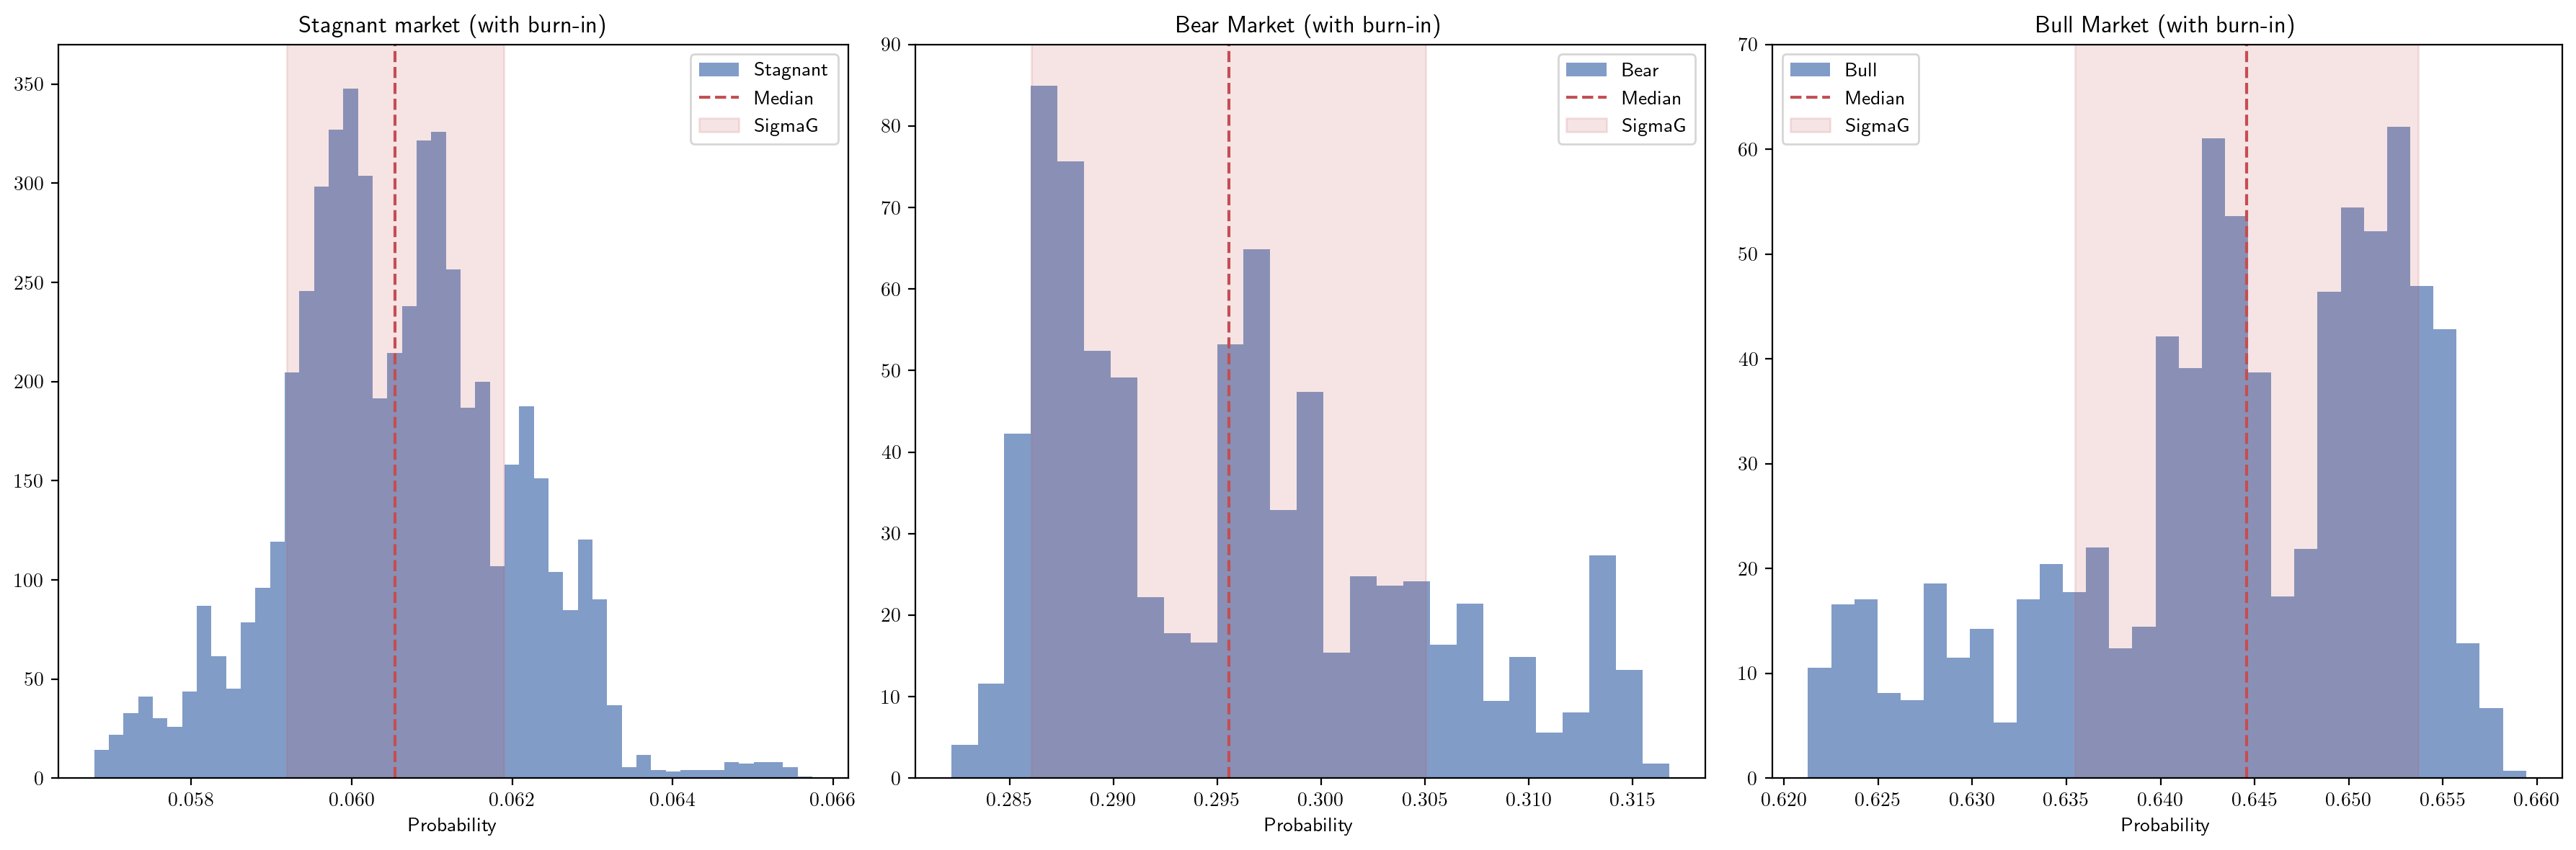

In [21]:
fig, axs = plt.subplots(1, 3, figsize=(18, 6))
y_grid = np.linspace(0, 400, 100)

# Stagnation
hist(freq_stagn_b, bins="freedman", density=True, alpha=0.7, ax=axs[0], label="Stagnant")
axs[0].axvline(median_stagn, color='C2', ls='--', label='Median')
axs[0].fill_betweenx(y_grid, median_stagn-sigmaG_stagn, median_stagn+sigmaG_stagn, 
                     color="C2", alpha=0.15, label="SigmaG")
axs[0].set_ylim(0, 370)
axs[0].set_xlabel('Probability')
axs[0].set_title('Stagnant market (with burn-in)')
axs[0].legend()

# Bear
hist(freq_bear_b, bins="freedman", density=True, alpha=0.7, ax=axs[1], label="Bear")
axs[1].axvline(median_bear, color='C2', ls='--', label='Median')
axs[1].fill_betweenx(y_grid, median_bear-sigmaG_bear, median_bear+sigmaG_bear, 
                     color="C2", alpha=0.15, label="SigmaG")
axs[1].set_ylim(0, 90)
axs[1].set_xlabel('Probability')
axs[1].set_title('Bear Market (with burn-in)')
axs[1].legend()

# Bull
hist(freq_bull_b, bins="freedman", density=True, alpha=0.7, ax=axs[2], label="Bull")
axs[2].axvline(median_bull, color='C2', ls='--', label='Median')
axs[2].fill_betweenx(y_grid, median_bull-sigmaG_bull, median_bull+sigmaG_bull, 
                     color="C2", alpha=0.15, label="SigmaG")
axs[2].set_ylim(0, 70)
axs[2].set_xlabel('Probability')
axs[2].set_title('Bull Market (with burn-in)')
axs[2].legend()


plt.tight_layout()
plt.show()